# Setup

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

In [2]:
def plot_mixed_results(run_folder: str, rho_folder: str):
    run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)
    rho_folder_path = os.path.join(run_folder_path, rho_folder)
    
    rho = float(re.match(r'rho=(\d+\.\d+)', rho_folder).groups()[0])
    
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(6*2, 4))
    
    # region Subplot 1 = Total States
    
    results = {
        'Infected': {
            'Color': 'red',
            'Totals': [],
            'STD': [] 
        },
        'Hospitalised': {
            'Color': 'green',
            'Totals': [],
            'STD': [] 
        },
        'Dead': {
            'Color': 'blue',
            'Totals': [],
            'STD': [] 
        },
    }
    
    for filename in os.listdir(rho_folder_path):
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+=(\d+\.\d+)_\d+\.\d+_totals.csv', filename)
        
        if match is None:
            continue
        
        alpha = float(match.groups()[0])
        totals_df = pd.read_csv(os.path.join(rho_folder_path, filename))
        
        for key in results:
            results[key]['Totals'].append((alpha, totals_df.iloc[-1][key]))
            results[key]['STD'].append((alpha, totals_df.iloc[-1][key + '_STD']))
            
    for key in results:
        results[key]['Totals'].sort()
        axes[0].scatter([x for x, _ in results[key]['Totals']], [y for _, y in results[key]['Totals']], label=key)
        axes[0].errorbar([x for x, _ in results[key]['Totals']], [y for _, y in results[key]['Totals']], yerr=[y for _, y in results[key]['STD']], alpha=0.25)
        
    axes[0].set_xlabel('Alpha, α')
    axes[0].set_ylabel('Total Percentage of Population')  
    axes[0].set_title('Alphas vs State Totals (ρ = ' + str(rho) + ')')
    axes[0].legend()
    
    # endregion
    
    # * Subplot 3 = 'Flatness' measure
    peak_results = []
    spread_results = []
    
    for filename in os.listdir(rho_folder_path):
        filename_path = os.path.join(rho_folder_path, filename)
        match = re.match(r'[A-Z]+_[A-Z]+_[A-Z]+_[A-Z]+=(\d+\.\d+)_\d+\.\d+_states.csv', filename)
        
        if match is None:
            continue
        
        alpha = float(match.groups()[0])
        
        states_df = pd.read_csv(filename_path)
        
        spread_results.append((alpha, np.std(states_df['Hospitalised'].values))) 
        peak_results.append((alpha, max(states_df['Hospitalised'].values)))
         
    spread_results.sort()
    peak_results.sort()
    
    axes[1].plot([x for x, _ in spread_results], [y for _, y in spread_results], label='Spread of curve')
    axes[1].plot([x for x, _ in peak_results], [y for _, y in peak_results], label='Peak of curve')
    axes[1].set_title("Alpha, α vs 'Flatness' of Hospitalised Curve")
    axes[1].set_xlabel('Alpha, α')
    axes[1].set_ylabel("'Flatness' of Hospitalised Curve")
    
    axes[1].legend()
    
    plt.plot()

# Rho = 0.100

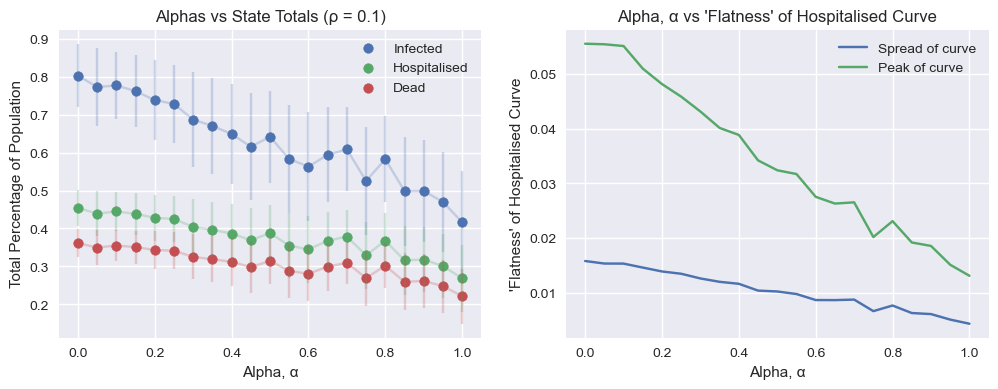

In [3]:
plot_mixed_results(run_folder='mixed', rho_folder='rho=0.100')

# Rho = 0.250

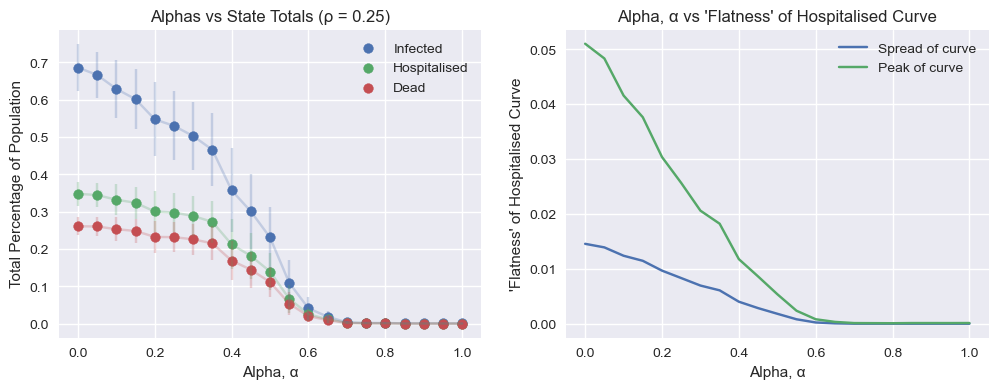

In [4]:
plot_mixed_results(run_folder='mixed', rho_folder='rho=0.250')

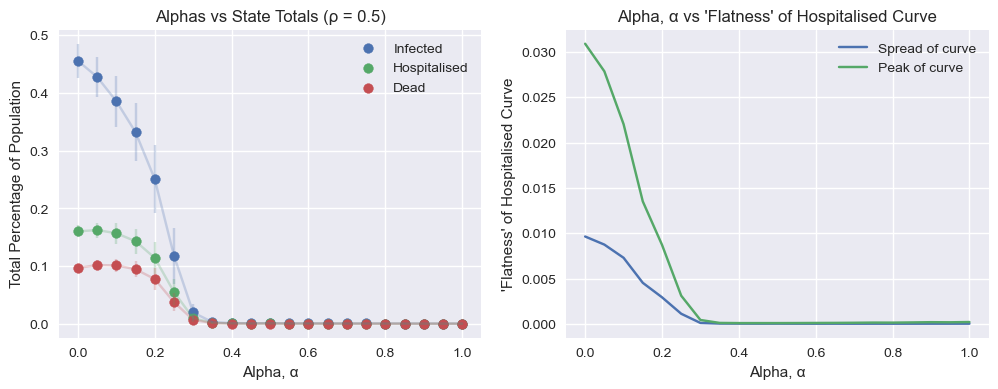

In [5]:
plot_mixed_results(run_folder='mixed', rho_folder='rho=0.500')